#### Name: Sumanasekara W.K.G.G. <br/> Index: 190610E

In [29]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10, mnist

In [30]:
def f(x):
    w = np.array((1, -1, -12, 15, 5))
    M = np.size(w)-1
    return np.sum([x**i*w[M-i] for i in range(M+1)], axis=0)

def g(x):
    w = np.array((1, -1, -12, 15, 5))
    M = np.size(w)-1 
    return np.sum([i*x**(i-1)*w[M-i] for i in range (M+1)], axis=0)   

x =  -2.4003994283530288 f(x) =  -53.11840483760499


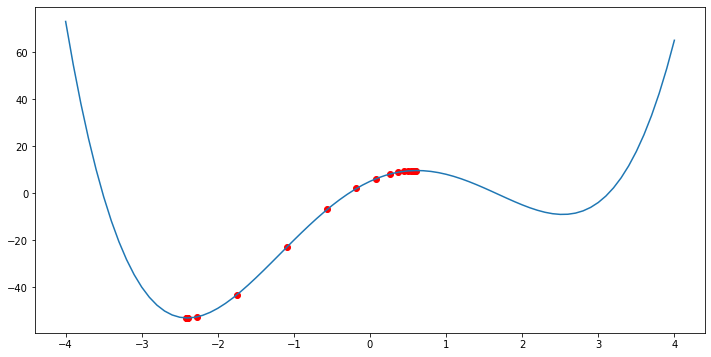

In [31]:
alpha, x = 0.02,  0.6
x_hist,  fx_hist = np.array(x), np.array(f(x))

for i in range(20):
    x = x-alpha*g(x)
    x_hist = np.append(x_hist, x)
    fx_hist = np.append(fx_hist, f(x))

print("x = ", x, "f(x) = ", f(x))

fig = plt.figure(figsize=(12, 6))
ax = plt.subplot(1, 1, 1)
delta = 0.1
x_ = np.arange(-4, 4+delta, delta)
ax.plot(x_, f(x_))
ax.scatter(x_hist, fx_hist, c="r")
plt.show()

In [32]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(" x_train => ", x_train.shape)

Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
x_train = x_train[range(Ntr), : ]
x_test = x_test[range(Nte), : ]
y_train = y_train[range(Ntr)]
y_test = y_test[range(Nte)]

k = len(np.unique(y_train))
y_train = tf.keras.utils.to_categorical(y_train, num_classes=k)

x_train = np.reshape(x_train, (Ntr, Din))
x_train = x_train.astype(np.float32)
x_train /= 255.

x_test = np.reshape(x_test, (Nte, Din))
x_test = x_test.astype(np.float32)
x_test /= 255.

 x_train =>  (50000, 32, 32, 3)


In [33]:
std, lr, lr_decay, epochs, batch_size = 1e-5, 1e-3, 0.1, 11, 1000 
w = std*np.random.randn(Din, k)
b = np.zeros(k)
loss_history = []
rng = np.random.default_rng(seed=0)

for e in range(epochs):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    
    for batch in range(Ntr//batch_size):
        batch_indices = indices[batch*batch_size:(batch+1)*batch_size]
        x = x_train[batch_indices]
        y = y_train[batch_indices]
        
        y_pred = x@w + b
        loss = 1./batch_size*np.square(y_pred - y).sum()
        loss_history.append(loss)

        dy_pred = 1./batch_size*2.0*(y_pred - y)
        dw = x.T @ dy_pred
        db = dy_pred.sum(axis=0)*1
        w = w - lr*dw
        b = b - lr*db

    print('Iteration %d / %d: loss %f'%(e, epochs, loss))
    if e % 10 ==0: lr *= lr_decay

Iteration 0 / 11: loss 0.850459
Iteration 1 / 11: loss 0.843256
Iteration 2 / 11: loss 0.847279
Iteration 3 / 11: loss 0.846354
Iteration 4 / 11: loss 0.842244
Iteration 5 / 11: loss 0.836758
Iteration 6 / 11: loss 0.840579
Iteration 7 / 11: loss 0.837717
Iteration 8 / 11: loss 0.830116
Iteration 9 / 11: loss 0.833111
Iteration 10 / 11: loss 0.834907


In [34]:
# Utility function for diaplaying
def display(y_train, y_test, y_train_pred, y_test_pred, loss_history, w, showim = True):
    plt.plot(loss_history)


     # For diapaying the weights matrix w as an image. 32*32*3 assumption is there
    if showim:
        f, axarr = plt.subplots(2, 5)
        f.set_size_inches(16, 6)        
        for i in range(10):
            img = w[:, i].reshape(32, 32, 3)# CIFAR10
            # img = w1[:, i].reshape(28, 28)# MNIST    
            img = (img - np.amin(img))/(np.amax(img) - np.amin(img))
            axarr[i//5, i%5].imshow(img)
        plt.show()

    train_acc = np.mean(np.abs(np.argmax(y_train, axis=1) == np.argmax(y_train_pred, axis=1)))
    print("train_acc = ", train_acc)

    test_acc = np.mean(np.abs(np.argmax(y_test, axis=1) == np.argmax(y_test_pred, axis=1)))
    print("test_acc = ", test_acc)

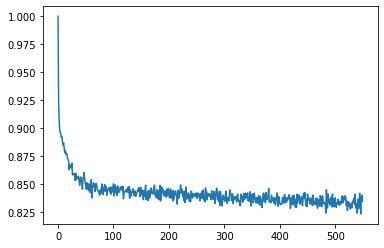

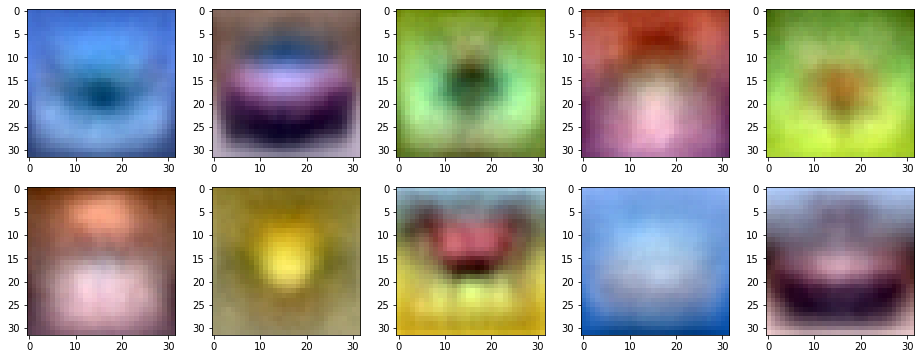

train_acc =  0.33576
test_acc =  0.1314


In [35]:
y_train_pred = x_train.dot(w) + b
y_test_pred = x_test.dot(w) + b

display(y_train, y_test, y_train_pred, y_test_pred, loss_history, w)